# Student Performance Analysis – Data Preprocessing  
### Domain: Education

This notebook focuses on preprocessing the Student Performance dataset from the 
UCI Machine Learning Repository. The dataset contains information about students' 
demographic details, family background, study habits, lifestyle, and academic performance.


## Problem Statement

Student academic performance is influenced by various factors such as family background, 
study habits, social behavior, and school environment. Understanding these factors can help 
educational institutions design better academic support and intervention strategies.

The objective of this project is to preprocess the Student Performance dataset and prepare 
it for further exploratory data analysis (EDA).


## Objectives

- To load and understand the Student Performance dataset  
- To check for missing values and duplicate records  
- To identify numerical and categorical variables  
- To create additional meaningful features  
- To apply logical filtering on the data  
- To detect outliers in key numerical features  
- To generate a final cleaned dataset for EDA


## Dataset Description

- **Dataset Name:** Student Performance Dataset  
- **Domain:** Education  
- **Source:** UCI Machine Learning Repository  
- **File Used:** `student-mat.csv` (Math course)  

The dataset includes:
- Student demographics (age, sex, address, family size)  
- Family background (parents' education and job, family relationships)  
- Academic-related features (study time, failures, absences, grades G1, G2, G3)  
- Social and lifestyle features (going out, alcohol consumption, health, etc.)  
- Final academic performance (G3 – final grade)


## 1. Importing Required Libraries


In [ ]:
import pandas as pd
import numpy as np


## 2. Data Loading

The dataset is loaded using the Pandas library.


In [5]:
df = pd.read_csv("student-mat.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 3. Dataset Shape

We check the number of rows and columns in the dataset.


In [3]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 395
Number of Columns: 33


## 4. Dataset Information

This step provides an overview of:
- Column names  
- Data types  
- Non-null value counts


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 5. Statistical Summary

We view the basic statistical summary of numerical features.


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 6. Missing Value Analysis

We check for missing (null) values in each column.


In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

**Observation:**  
There are no missing values in any column. Therefore, no imputation is required.


## 7. Duplicate Record Analysis

We check if there are any duplicate rows present in the dataset.


In [7]:
df.duplicated().sum()

np.int64(0)

**Observation:**  
No duplicate records were found in the dataset.


## 8. Identification of Numerical and Categorical Features


In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", categorical_columns)

Numerical Columns:
 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

Categorical Columns:
 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## 9. Basic Value Checks for Key Columns

We verify the unique values for some important categorical and numeric columns.


In [9]:
print("Unique values in 'sex':", df['sex'].unique())
print("Unique values in 'address':", df['address'].unique())
print("Unique values in 'studytime':", df['studytime'].unique())
print("Unique values in 'failures':", df['failures'].unique())
print("Unique values in 'schoolsup':", df['schoolsup'].unique())
print("Unique values in 'famsup':", df['famsup'].unique())

Unique values in 'sex': ['F' 'M']
Unique values in 'address': ['U' 'R']
Unique values in 'studytime': [2 3 1 4]
Unique values in 'failures': [0 3 2 1]
Unique values in 'schoolsup': ['yes' 'no']
Unique values in 'famsup': ['no' 'yes']


## 10. Creating a Working Copy

We create a separate copy of the dataset for preprocessing.


In [6]:
df_processed = df.copy()

## 11. Feature Engineering

We create additional meaningful features:

1. **avg_grade** – Average of G1, G2, and G3  
2. **alcohol_level** – Average of weekday and weekend alcohol consumption (Dalc & Walc)  
3. **performance_change** – Change in performance from first grade (G1) to final grade (G3)


In [14]:
df_processed['avg_grade'] = (df_processed['G1'] + df_processed['G2'] + df_processed['G3']) / 3

df_processed['alcohol_level'] = (df_processed['Dalc'] + df_processed['Walc']) / 2

df_processed['performance_change'] = df_processed['G3'] - df_processed['G1']

df_processed[['G1','G2','G3','avg_grade','alcohol_level','performance_change']].head()


,G1,G2,G3,avg_grade,alcohol_level,performance_change
0,5,6,6,5.666667,1.0,1
1,5,5,6,5.333333,1.0,1
2,7,8,10,8.333333,2.5,3
3,15,14,15,14.666667,1.0,0
4,6,10,10,8.666667,1.5,4


## 12. Data Filtering

Logical filtering is applied to remove unrealistic or extreme values 
that may affect the analysis.


### 12.1 Removing Records with Zero or Invalid Study Time

Study time is expected to be between 1 and 4. We keep only valid values.


In [12]:
df_processed = df_processed[df_processed['studytime'].between(1, 4)]

### 12.2 Filtering Extreme Absence Values

Students with extremely high absences (above the 95th percentile) are removed 
to reduce skewness and focus on typical student behavior.


In [13]:
upper_absence_limit = df_processed['absences'].quantile(0.95)
df_processed = df_processed[df_processed['absences'] <= upper_absence_limit]

### 12.3 Filtering Invalid Grade Values

We ensure that all grade values (G1, G2, G3) lie within the valid range 0–20.


In [14]:
df_processed = df_processed[
    df_processed['G1'].between(0, 20) &
    df_processed['G2'].between(0, 20) &
    df_processed['G3'].between(0, 20)
]

## 13. Outlier Detection (IQR Method for Absences)

We detect potential outliers in the `absences` feature using the Interquartile Range (IQR) method.
Outliers are **not removed**, but this information is useful for understanding the data.


In [15]:
Q1 = df_processed['absences'].quantile(0.25)
Q3 = df_processed['absences'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_processed[(df_processed['absences'] < lower_bound) | 
                        (df_processed['absences'] > upper_bound)]

outliers.shape

(5, 36)

**Observation:**  
Some outliers are present in `absences`. These records are retained as they may 
represent genuine student behavior.

## 14. Final Preprocessed Dataset Shape


In [7]:
df_processed.shape

(395, 33)

# Data Visualization

After preprocessing, data visualization is performed to identify patterns, trends, 
and relationships between different factors and student academic performance.
The visualizations focus on academic, behavioral, and environmental factors 
that influence final grades.


## Importing Required Libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(rc={"figure.figsize": (8, 5)})

## Visualization Overview

The following visualizations are selected as the most relevant for understanding
student performance:

1. Distribution of Final Grade  
2. Study Time vs Final Grade  
3. Absences vs Final Grade  
4. Internet Access vs Final Grade  
5. Alcohol Consumption vs Final Grade  
6. Grade Progression (G1 → G3)  
7. Correlation Heatmap  
8. Parental Education vs Final Grade  
9. Failures vs Final Grade  

## 1. Distribution of Final Grade (G3)

This plot shows how students are distributed across different final grade values.


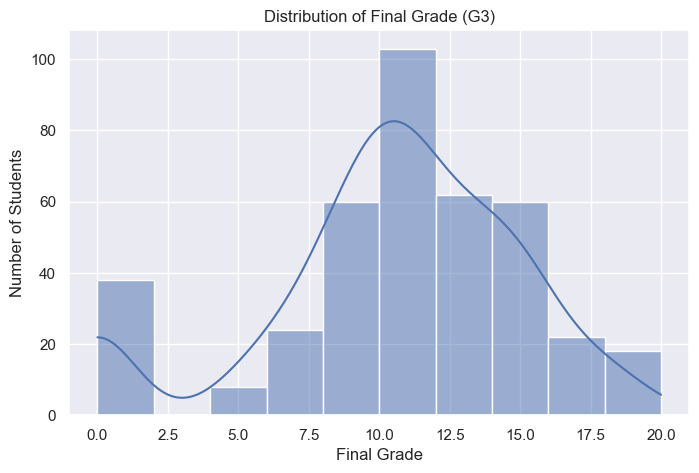

In [9]:
sns.histplot(df_processed['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()

## 2. Study Time vs Final Grade

This visualization shows the relationship between study time and academic performance.


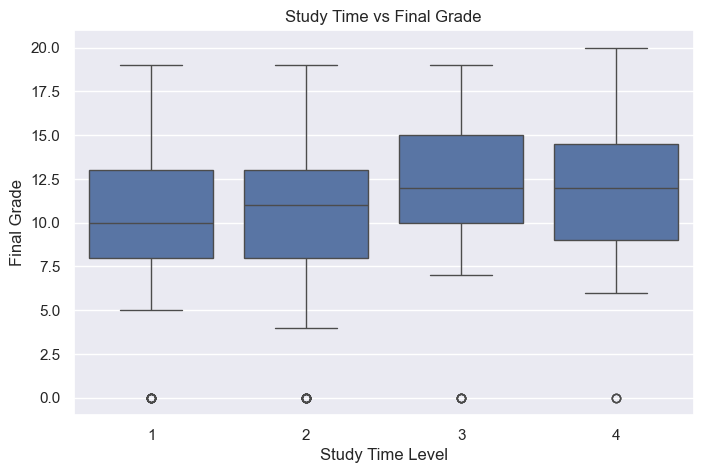

In [10]:
sns.boxplot(x='studytime', y='G3', data=df_processed)
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time Level")
plt.ylabel("Final Grade")
plt.show()

## 3. Absences vs Final Grade

This plot highlights the impact of attendance on student performance.


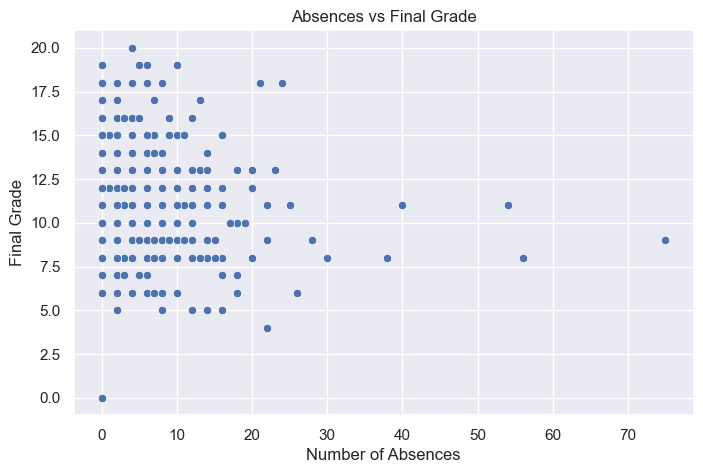

In [11]:
sns.scatterplot(x='absences', y='G3', data=df_processed)
plt.title("Absences vs Final Grade")
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade")
plt.show()

## 4. Internet Access vs Final Grade

This visualization compares the academic performance of students with and without internet access.


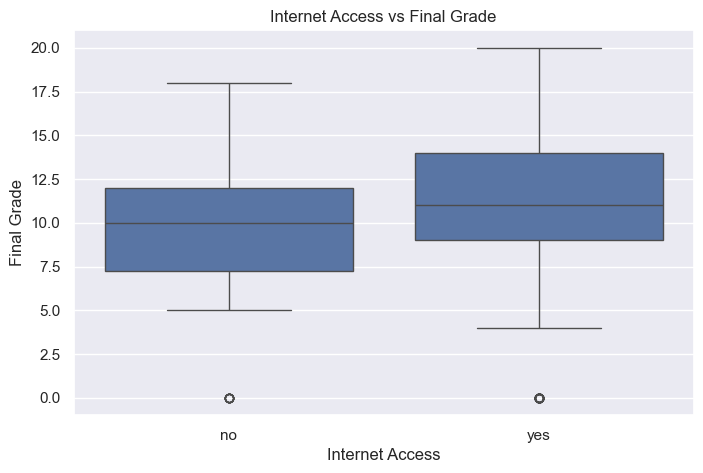

In [12]:
sns.boxplot(x='internet', y='G3', data=df_processed)
plt.title("Internet Access vs Final Grade")
plt.xlabel("Internet Access")
plt.ylabel("Final Grade")
plt.show()

## 5. Alcohol Consumption vs Final Grade

This plot examines how lifestyle behavior affects academic performance.


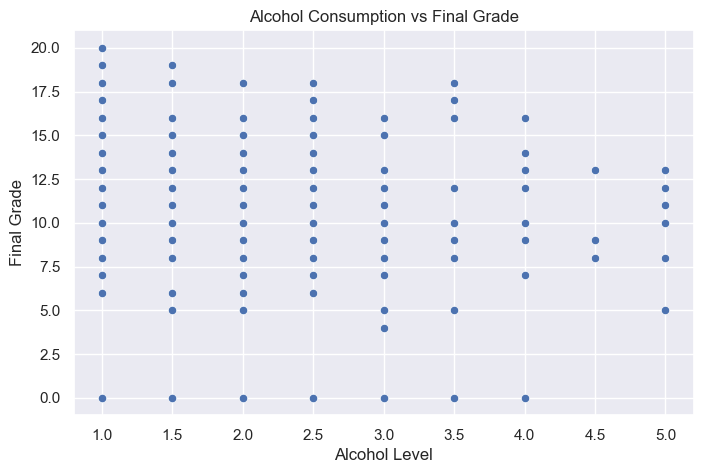

In [15]:
sns.scatterplot(x='alcohol_level', y='G3', data=df_processed)
plt.title("Alcohol Consumption vs Final Grade")
plt.xlabel("Alcohol Level")
plt.ylabel("Final Grade")
plt.show()

## 6. Grade Progression Across Periods (G1 → G3)

This visualization shows how average student performance changes across assessment periods.


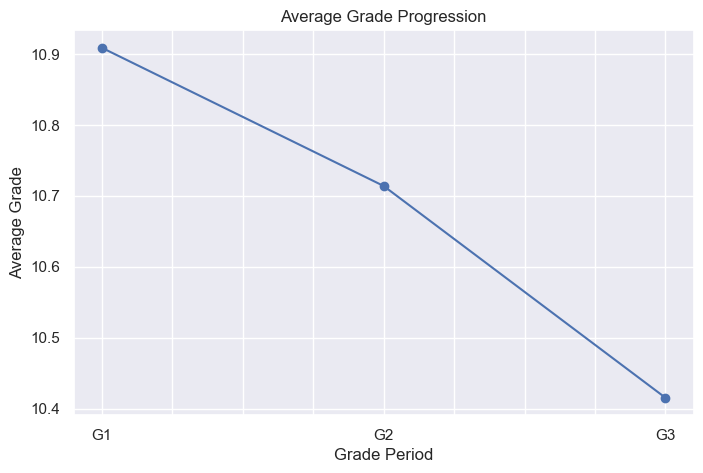

In [16]:
df_processed[['G1','G2','G3']].mean().plot(marker='o')
plt.title("Average Grade Progression")
plt.xlabel("Grade Period")
plt.ylabel("Average Grade")
plt.grid(True)
plt.show()

## 7. Correlation Heatmap of Key Features

This heatmap summarizes relationships between important academic and behavioral variables.


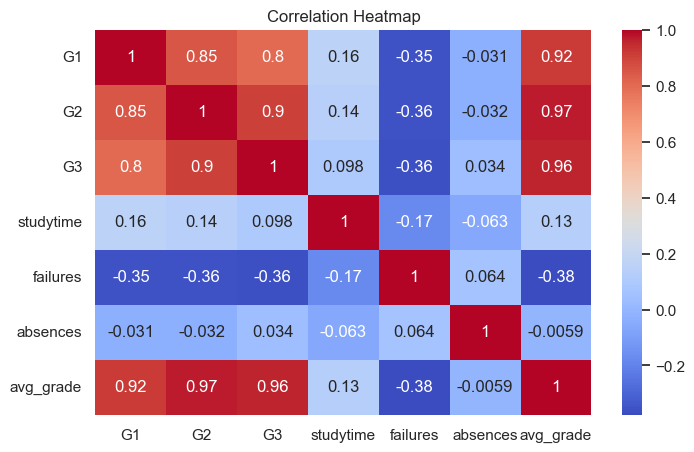

In [17]:
corr_features = ['G1','G2','G3','studytime','failures','absences','avg_grade']
sns.heatmap(df_processed[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 8. Parental Education vs Final Grade

This visualization analyzes the influence of parents' education on student performance.

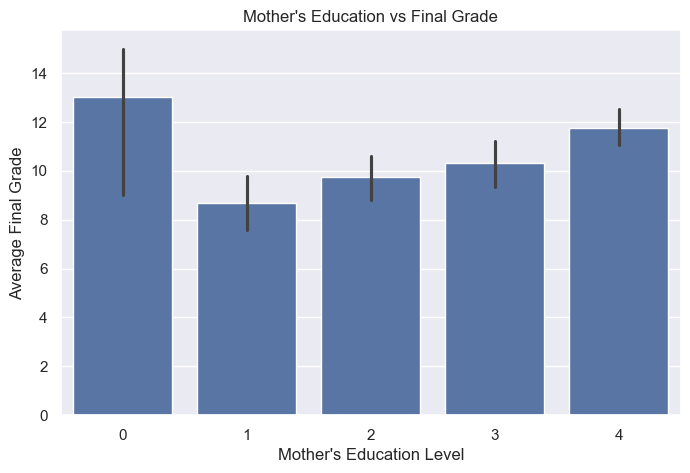

In [18]:
sns.barplot(x='Medu', y='G3', data=df_processed)
plt.title("Mother's Education vs Final Grade")
plt.xlabel("Mother's Education Level")
plt.ylabel("Average Final Grade")
plt.show()

## 9. Past Failures vs Final Grade

This plot shows how previous academic failures affect final performance.


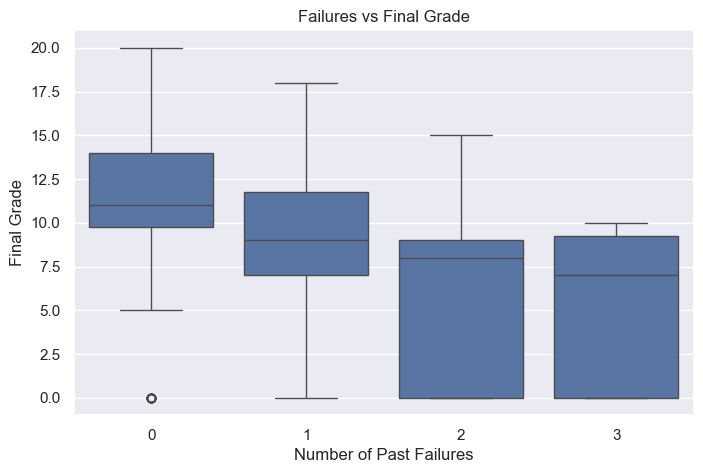

In [19]:
sns.boxplot(x='failures', y='G3', data=df_processed)
plt.title("Failures vs Final Grade")
plt.xlabel("Number of Past Failures")
plt.ylabel("Final Grade")
plt.show()

## Key Insights from Visualization

- Final grades are mostly concentrated in the mid-range, indicating average overall performance.
- Increased study time generally leads to higher academic performance.
- Higher absenteeism negatively impacts student grades.
- Internet access provides a slight academic advantage.
- Alcohol consumption shows a weak negative relationship with academic performance.
- Early grades (G1 and G2) strongly influence the final grade (G3).
- Students with educated parents tend to perform better academically.
- Students with previous failures generally score lower in final examinations.


# Conclusion

This project analyzed the Student Performance dataset using meaningful data visualizations
after thorough preprocessing. The analysis revealed that academic performance is influenced
by a combination of study habits, attendance, early academic results, family background, 
and lifestyle choices.

The insights obtained from this visualization phase can help educators and institutions
identify students at risk and design targeted interventions to improve learning outcomes.
